### Wczytaj zestaw danych, na przykład zestaw danych Breast Cancer dostępny w bibliotece scikitlearn. Wykonaj redukcję wymiarowości danych za pomocą algorytmu PCA. Przedstaw wyniki redukcji wymiarowości na wykresie, gdzie punkty danych są przedstawione w nowej przestrzeni o mniejszej liczbie wymiarów. Breast cancer dataset to zestaw danych dotyczący raka piersi zawiera cechy obrazów komórek rakowych pochodzących z biopsji. Zbiór ten zawiera 30 cech opisujących różne właściwości komórek. Jest to przydatny zestaw danych do analizy głównych składowych (PCA) w celu redukcji wymiarowości i wizualizacji danych

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792    

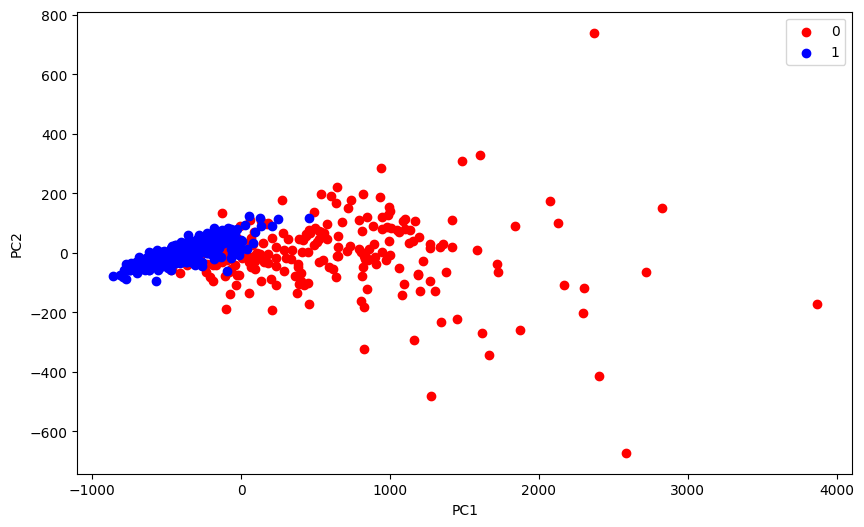

In [37]:
data = load_breast_cancer()
X = data.data
y = data.target

print(data.keys())

df = pd.DataFrame(X, columns=data.feature_names)
# 0 zonacza łagodny, 1 oznacza złośliwy guz
# df['target'] = y

scaler = StandardScaler()
X_po_standaryzacji = scaler.fit_transform(X)
df_po_standaryzacji = pd.DataFrame(X_po_standaryzacji, columns=data.feature_names)

print(df_po_standaryzacji)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
for label, color in zip(np.unique(y), ["red", "blue"]):
 plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], color=color, label=label)
plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()




### Widzimy, że w nowej przestrzeni cech dane pacjętów ze złośliwym guzem można spróbować odizolować od reszty. więc próba zbudowania klasyfikatora powinna przebiec pomyślnie - nawet bylibyśmy w stanie przewidzieć większość przypadków zrobieniem regresji liniowej w tej przestrzeni 2d, dane mają bardzo dużo wymiarów, więc jeśli w 2d jesteśmy w stanie dużo zrobić to w xd powinno to być jeszcze lepsze.

## Wczytaj zestaw danych np. Digits dataset (baza ręcznie pisanych cyfr). Wykonaj redukcję wymiarowości danych za pomocą metody t-SNE. Przedstaw wyniki na wykresie 2D, gdzie każdacyfra będzie miała swoją reprezentację w przestrzeni 2D.Zbiór Digits dataset to zestaw danych zawierających obrazy ręcznie napisanych cyfr od 0 do 9.Każdy obraz ma rozmiar 8x8 pikseli, co daje 64 cechy. Zestaw zawiera 1797 przykładów. Jest to przydatny zestaw danych do zadań redukcji wymiarowości

Klucze w zbiorze danych: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794    

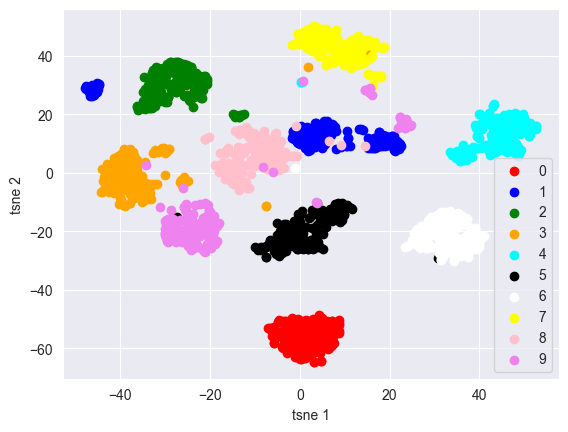

In [5]:
digits = load_digits()

print("Klucze w zbiorze danych:", digits.keys())
X = digits.data
y = digits.target

print(X)
print(Y)
df = pd.DataFrame(X, columns=digits.feature_names)
df["target"] = y

print(df)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

for label, color in zip(np.unique(y), ["red", "blue","green","orange","cyan","black","white", "yellow", "pink", "violet"]):
 plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], color=color, label=label)
plt.legend()
plt.xlabel("tsne 1")
plt.ylabel("tsne 2")
plt.show()




### Widać że t-sne dobrze spisał się z rozróżnianiem liczb, przypuszczam że zbudowanie klasyfikatora który miałby dużą dokładność przebiegło by pomyślnie. Co prawda czasem 9 ląduje obok 7 albo 3, lecz to tylko część punktów i przedyktor i tak mógłby wychwycić te wyjątki